In [65]:
def func(i,m,year,month,day,tbefore,tafter):
    import pandas
    import datetime
    from datetime import timedelta
    import pandas_datareader.data as web
    import fix_yahoo_finance as yf
    import matplotlib.pyplot as plt
    import numpy as np
    import statsmodels.api as sm
    event_date = datetime.datetime(year,month,day)
    start_date = event_date - timedelta(days = tbefore)
    end_date = event_date + timedelta(days = tafter)
    df = web.DataReader([i, m],'yahoo', start_date,end_date)
    df = df['Close']
    rets = df.pct_change()
    %matplotlib inline
    plt.scatter(rets[i],rets[m])
    X = rets[i]    
    X = sm.add_constant(X)
    y = rets[m]
    model = sm.OLS(y,X,missing='drop')
    result = model.fit()
    print(result.summary())
    (a,b) = result.params
    fig, ax = plt.subplots(figsize=(12,10))
    ax.plot(y)
    ax.plot(result.fittedvalues)
    rets['u'] = rets[i] - rets[m]*b - a
    rets['cumu'] = rets['u'].cumsum()
    fig, ax = plt.subplots(figsize=(12,10))
    ax.plot(rets['cumu'])

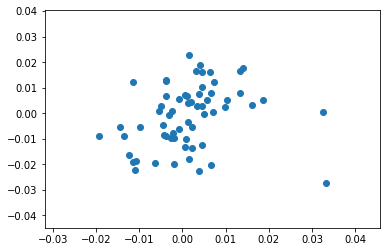

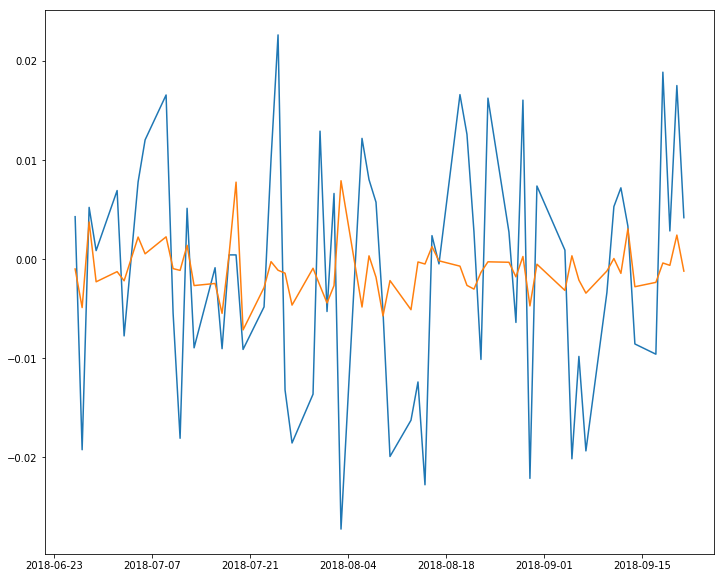

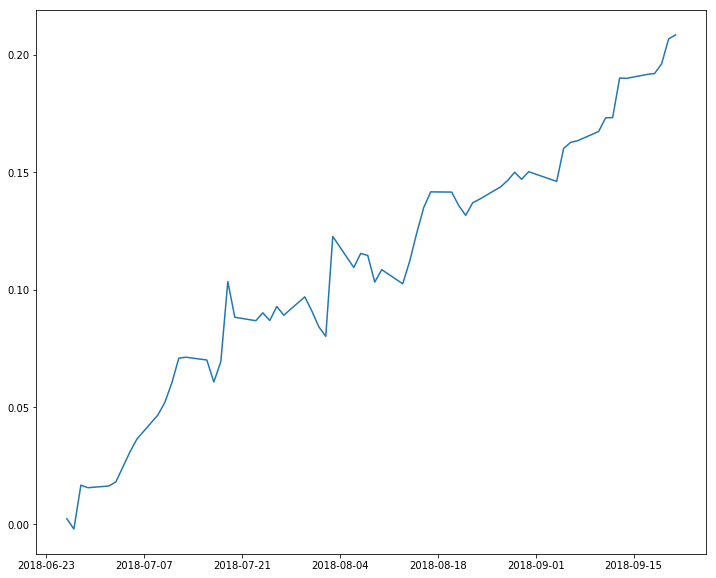

In [66]:
func('IBM', 'TAN',2018,8,23,60,30)